# EDA

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the dataset
data_path = os.path.abspath(os.path.join(os.pardir, 'data/Physical_Activity_Monitoring_unlabeled.csv'))
data = pd.read_csv(data_path)
print(f"There are {len(data)} entries in this dataset")
data.head()

There are 534601 entries in this dataset


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [3]:
# Check for missing value
missing_value = pd.DataFrame(data.isnull().sum())
missing_value.columns = ["missing_count"]
# Check the proportion of missing data
missing_value["missing_roportion"] = missing_value["missing_count"] / len(data)
missing_value

,missing_count,missing_roportion
timestamp,0,0.000000
handTemperature,4041,0.007559
handAcc16_1,4041,0.007559
handAcc16_2,4041,0.007559
handAcc16_3,4041,0.007559
handAcc6_1,4041,0.007559
handAcc6_2,4041,0.007559
handAcc6_3,4041,0.007559
handGyro1,4041,0.007559
handGyro2,4041,0.007559


In [4]:
# Calculate summary statistic
data.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


### Histogram

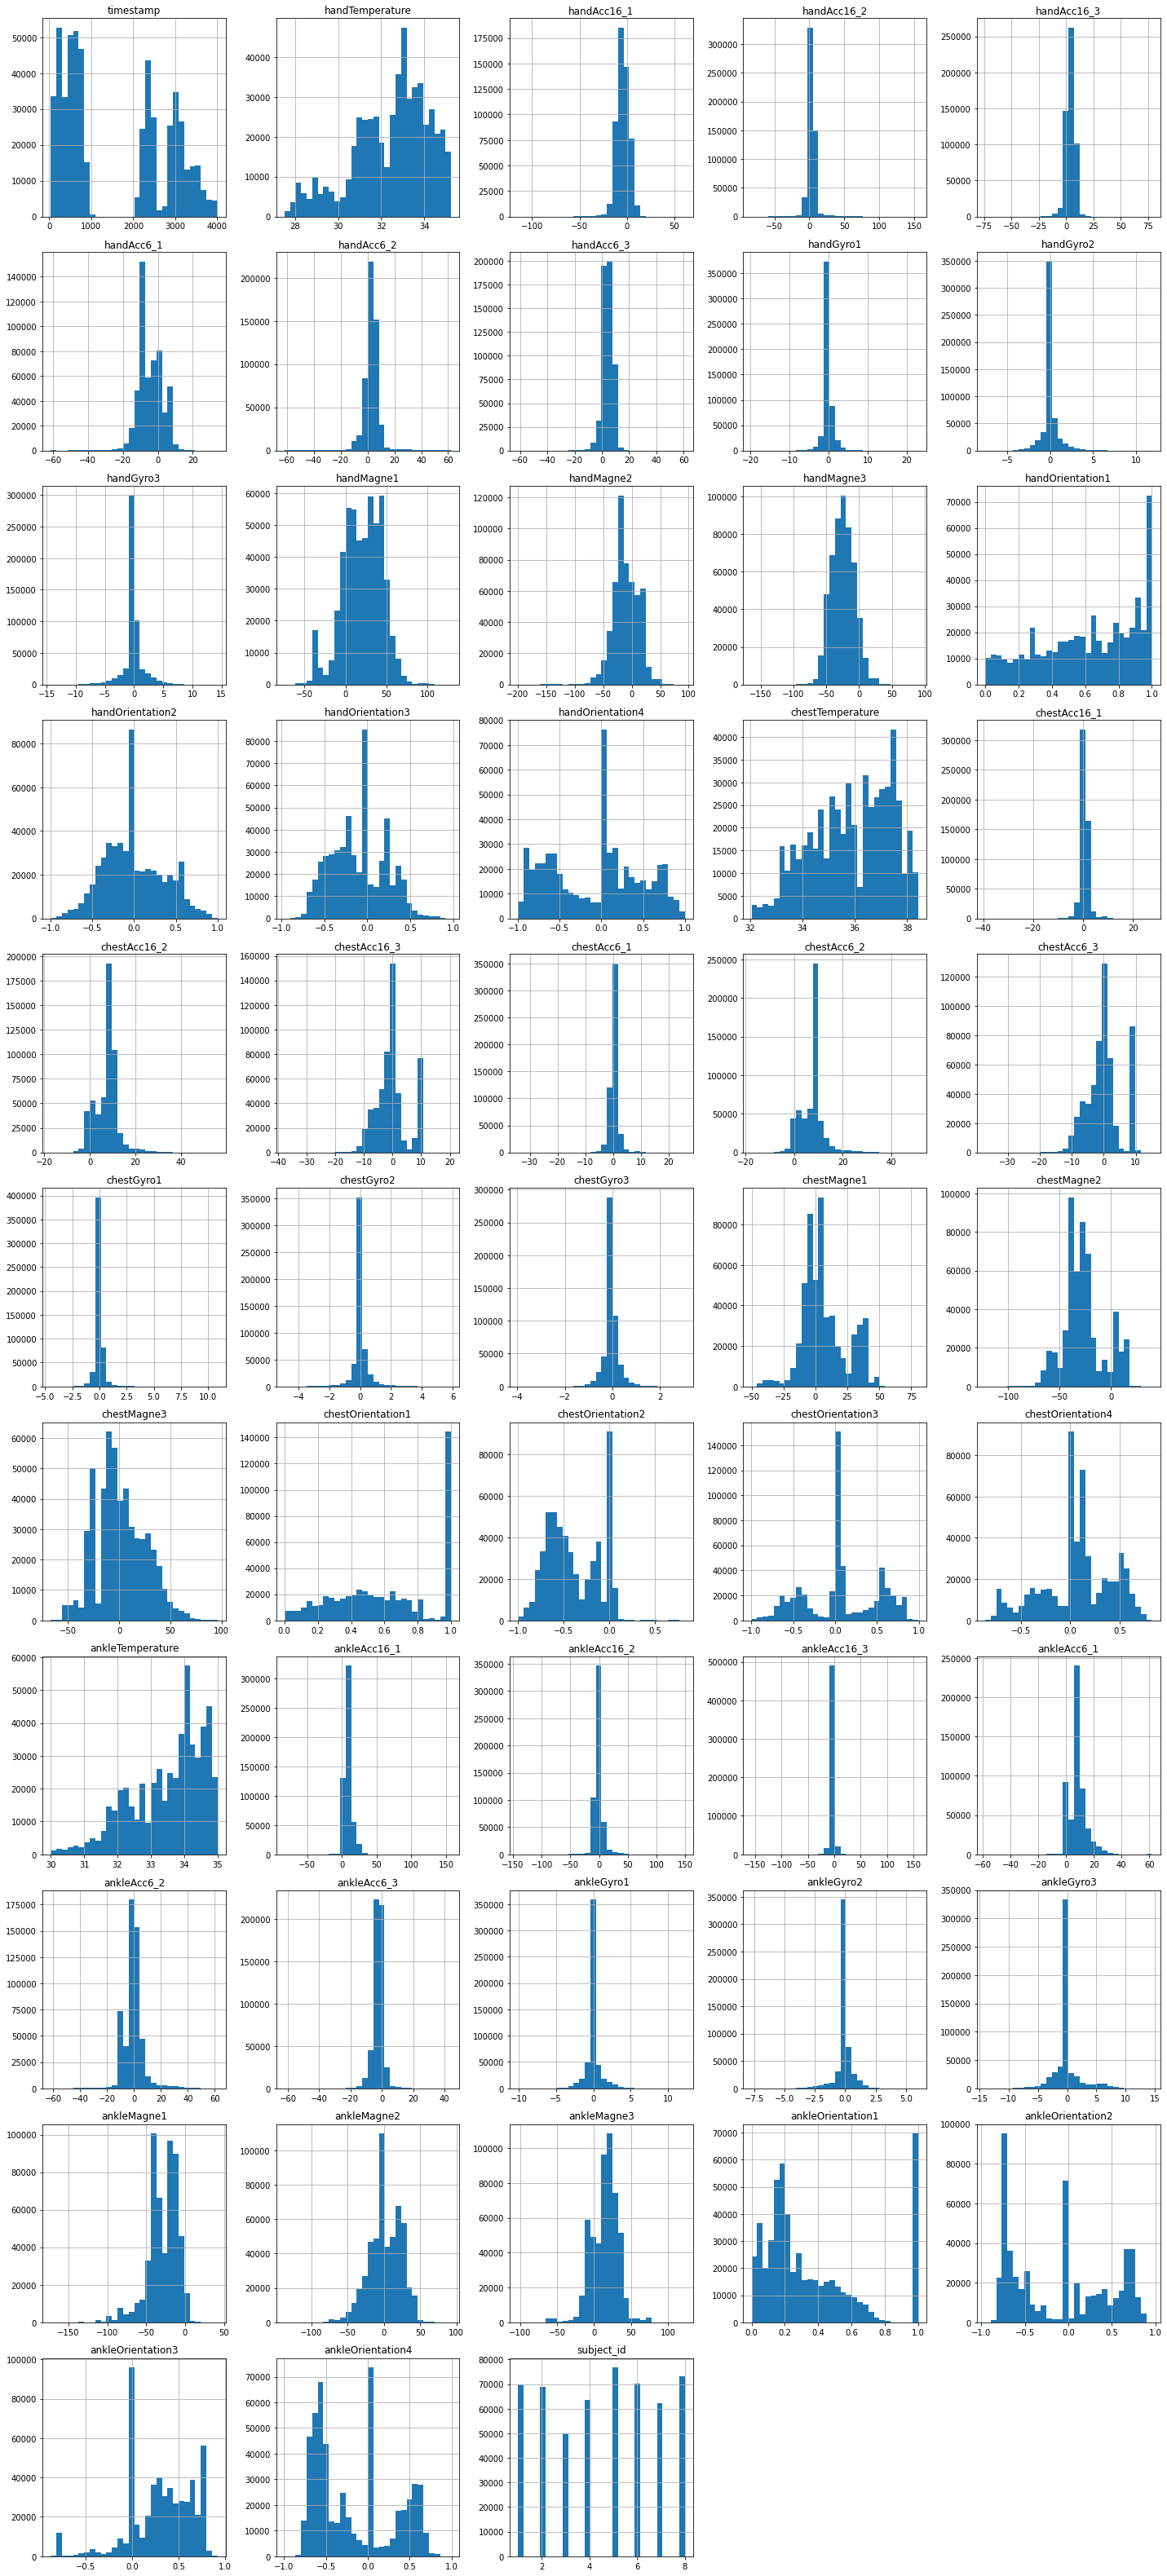

In [5]:
# Remove index column if present
data.reset_index(drop=True, inplace=True)

# Plot histograms for each column
data_columns = data.columns

# Determine the number of rows and columns for subplots
n_cols = 5
n_rows = int(np.ceil(len(data_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

for i, column in enumerate(data_columns):
    ax = axes[i // n_cols, i % n_cols]
    data[column].hist(ax=ax, bins=30)
    ax.set_title(column)

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

### Correlation Heatmap

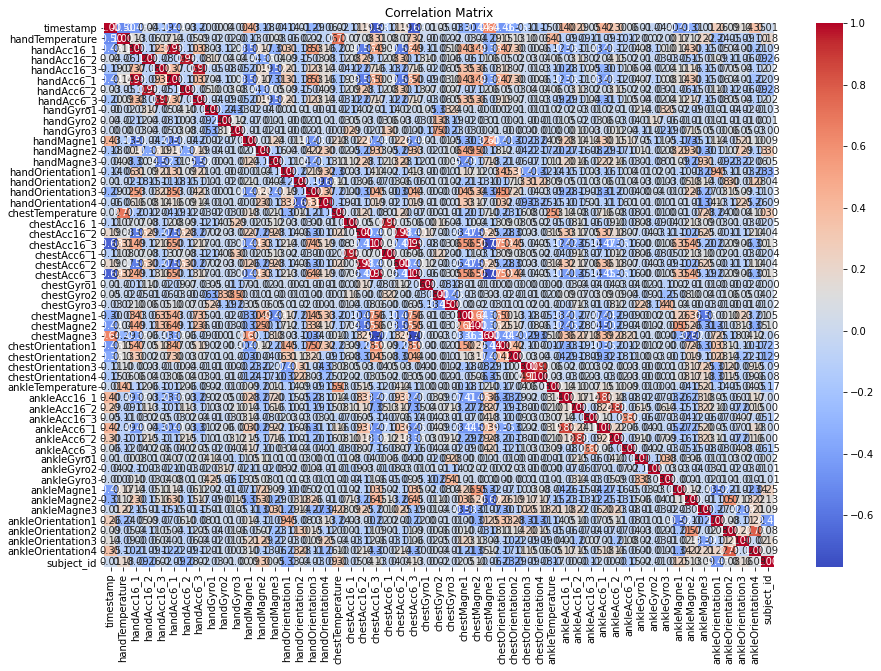

In [6]:
# Compute the correlation matrix to identify strong relationships between variables
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Find features with high correlations
def find_high_corr_pair(threshold=0.8):
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j])) 
    print(f"Pairs with correlation greater than {threshold}:")
    for pair in high_corr_pairs:
        print(pair)

find_high_corr_pair(0.8)

Pairs with correlation greater than 0.8:
('handAcc6_1', 'handAcc16_1')
('handAcc6_2', 'handAcc16_2')
('handAcc6_3', 'handAcc16_3')
('chestAcc6_1', 'chestAcc16_1')
('chestAcc6_2', 'chestAcc16_2')
('chestAcc6_3', 'chestAcc16_3')
('chestOrientation4', 'chestOrientation3')
('ankleAcc6_1', 'ankleAcc16_1')
('ankleAcc6_2', 'ankleAcc16_2')


### Pair Plot

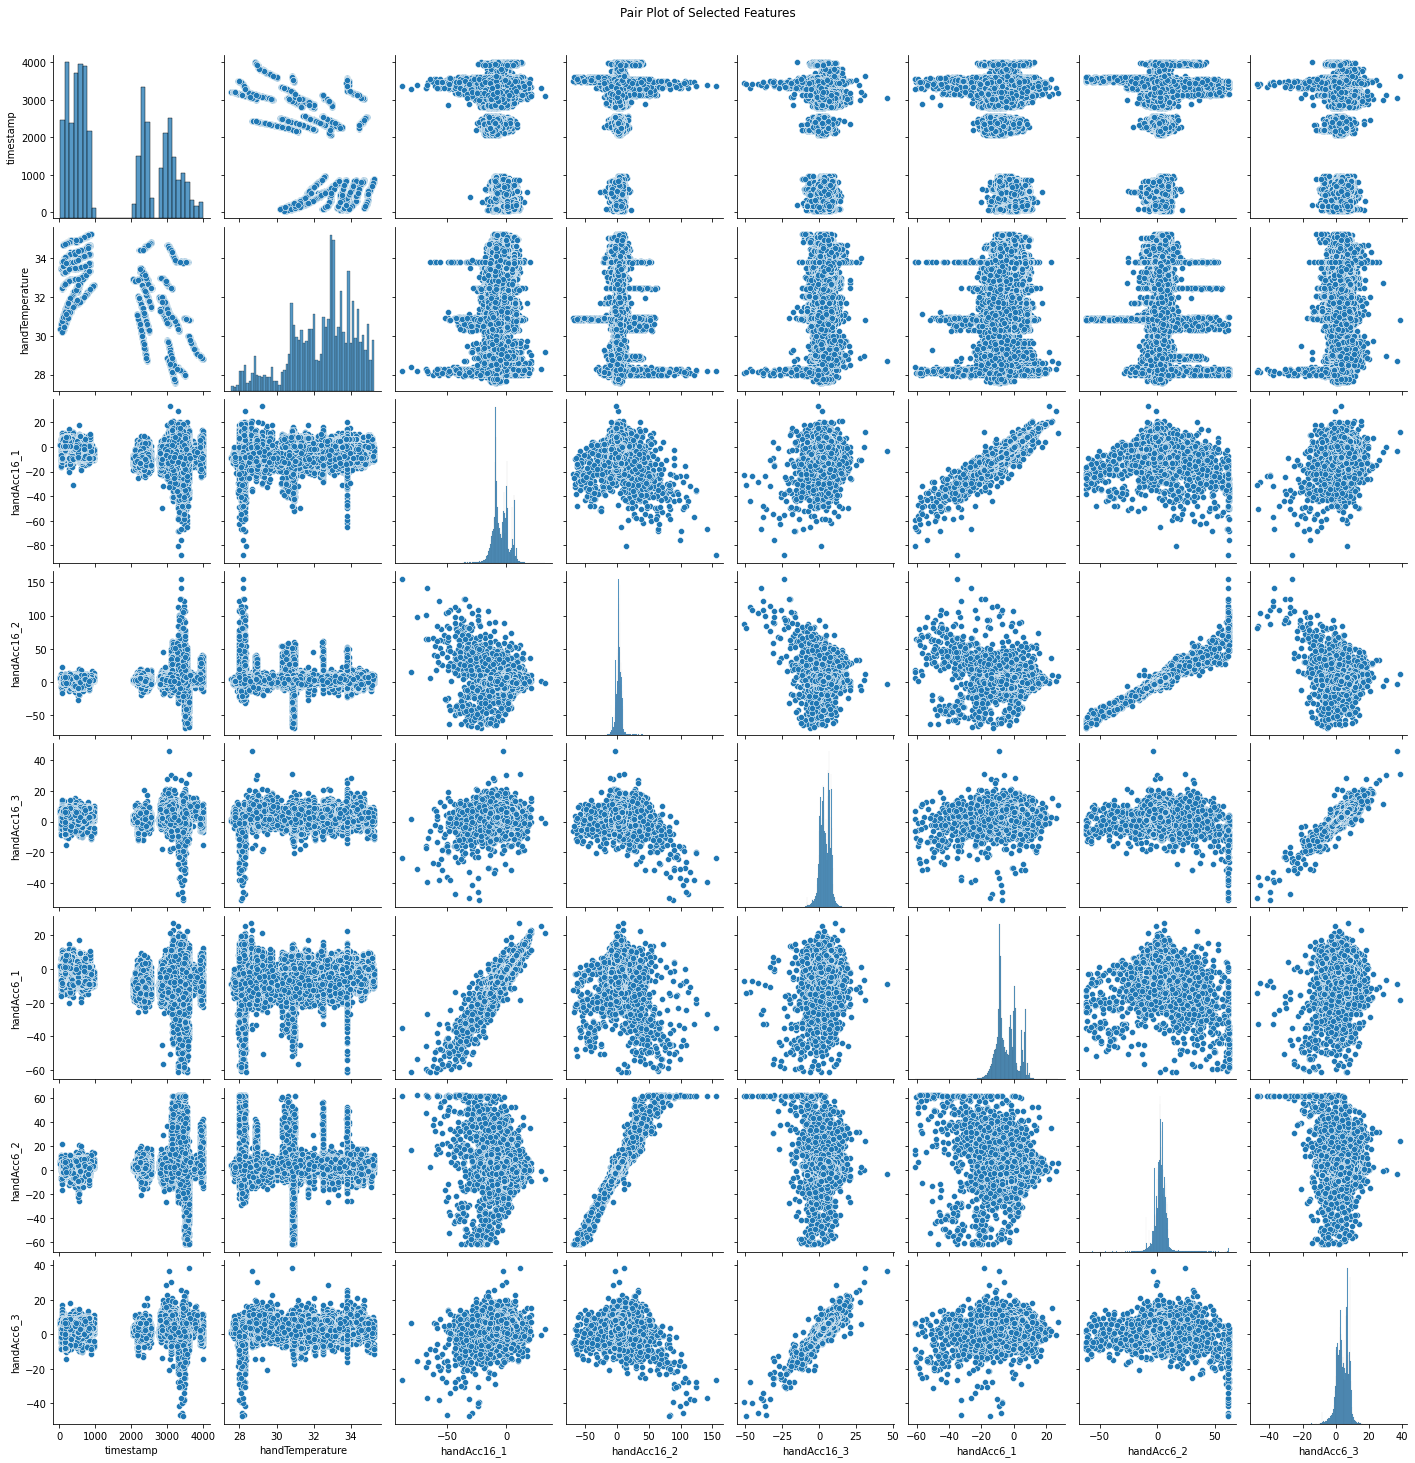

In [8]:
# Use pair plots to visualize relationships between pairs of features

sample_data = data.sample(frac=0.1, random_state=42)  # Adjust frac as needed

important_features = ['timestamp','handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3']  # Replace with actual feature names

sns.pairplot(sample_data[important_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

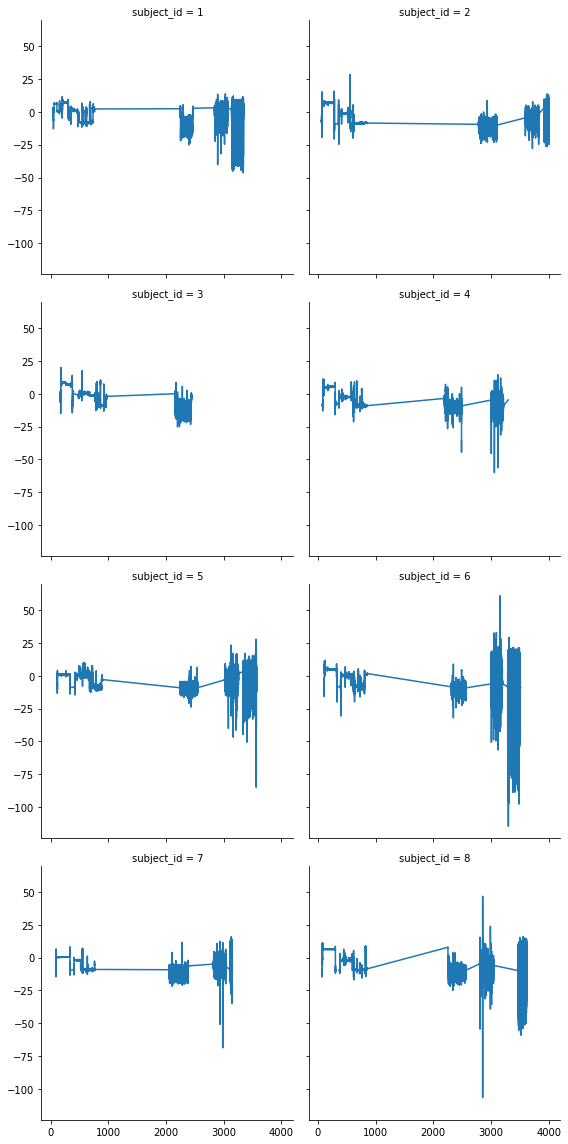

In [26]:
# Check whether timestamp and subject_id plays a role in the dataset
def plot_col_as_time_series(target_col):
    time_series = sns.FacetGrid(data, col='subject_id', col_wrap=2, height=4)
    time_series.map_dataframe(sns.lineplot, x='timestamp', y=target_col)

plot_col_as_time_series("handAcc16_1")